<a href="https://colab.research.google.com/github/mayamoneib/deliveryfood/blob/main/surveydata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Maya Moneib

Student ID: 55-26782

# Data mining process implemented on the Egyptian Dataset

To access the dataset, go to the 'mayamoneib/deliveryfood' repository then download 'Egypt Survey Data.csv.zip' and upload the csv file in this notebook to run the dataset

In [45]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#%matplotlib inline
#plt.style.use("seaborn")
#when using colab
# Set the style for plots using the updated seaborn style
plt.style.use("seaborn-v0_8") # Changed from 'seaborn' to 'seaborn-v0_8'

df = pd.read_csv('Egypt Survey Data.csv.zip')

# Data Inspection

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 31 columns):
 #   Column                                                                                         Non-Null Count  Dtype 
---  ------                                                                                         --------------  ----- 
 0   Timestamp                                                                                      264 non-null    object
 1   What is your preferred meal type to order?                                                     264 non-null    object
 2   What is your preferred time to order?                                                          264 non-null    object
 3   How long are you willing to wait for food delivery?                                            264 non-null    object
 4   Do you consider restaurant reviews before ordering via delivery platforms?                     264 non-null    object
 5   Do you prefer online food del

In [47]:
df.describe()

,Timestamp,What is your preferred meal type to order?,What is your preferred time to order?,How long are you willing to wait for food delivery?,Do you consider restaurant reviews before ordering via delivery platforms?,Do you prefer online food delivery over cooking at home?,App is user-friendly,Time-saving,Offers high-quality products,Offers tasty food products,...,Delivery of food while maintaining its appropriate temperature,Delivery of items in high-quality packaging,Accurate delivery tracking system,Friendly delivery personnel,Age?,Gender?,Marital Status?,Occupation?,From what type of area do you typically place your orders?,"Finally, do you think online food delivery platforms are the most convenient option nowadays?"
count,264,264,264,264,264,264,264,264,264,264,...,264,264,264,264,264,264,264,264,264,264
unique,262,4,3,5,5,5,5,5,5,5,...,5,5,5,5,5,2,2,4,3,2
top,2025/03/27 7:43:39 pm EET,Lunch,Anytime,30 minutes,Sometimes,Sometimes,Important,Important,Very Important,Very Important,...,Very Important,Important,Important,Moderately Important,Under 18,Female,Single,Employed,Moderate traffic,Yes
freq,2,129,148,102,127,158,113,119,125,144,...,113,106,103,77,67,153,192,122,166,207


In [48]:

df.isnull().sum()

,0
Timestamp,0
What is your preferred meal type to order?,0
What is your preferred time to order?,0
How long are you willing to wait for food delivery?,0
Do you consider restaurant reviews before ordering via delivery platforms?,0
Do you prefer online food delivery over cooking at home?,0
App is user-friendly,0
Time-saving,0
Offers high-quality products,0
Offers tasty food products,0


In [49]:
for column in df.columns:
    print(f"{column} : {df[column].value_counts()}")
    print("====================================")

Timestamp : Timestamp
2025/03/27 7:43:39 pm EET     2
2025/03/25 12:07:54 am EET    2
2025/03/27 7:55:27 pm EET     1
2025/03/27 7:54:45 pm EET     1
2025/03/27 7:52:22 pm EET     1
                             ..
2025/03/25 4:19:50 pm EET     1
2025/03/25 3:59:47 pm EET     1
2025/03/25 3:38:03 pm EET     1
2025/03/25 3:28:23 pm EET     1
2025/03/25 4:50:56 pm EET     1
Name: count, Length: 262, dtype: int64
What is your preferred meal type to order? : What is your preferred meal type to order?
Lunch        129
Dinner        76
Snacks        32
Breakfast     27
Name: count, dtype: int64
What is your preferred time to order?   : What is your preferred time to order?  
Anytime     148
Weekend      87
Weekdays     29
Name: count, dtype: int64
How long are you willing to wait for food delivery? : How long are you willing to wait for food delivery?
30 minutes          102
45 minutes           94
1 hour               38
15 minutes           25
More than 1 hour      5
Name: count, dtype: int

# Data cleaning & preprocessing

In [50]:

new_version = df.copy()
new_version.head()

,Timestamp,What is your preferred meal type to order?,What is your preferred time to order?,How long are you willing to wait for food delivery?,Do you consider restaurant reviews before ordering via delivery platforms?,Do you prefer online food delivery over cooking at home?,App is user-friendly,Time-saving,Offers high-quality products,Offers tasty food products,...,Delivery of food while maintaining its appropriate temperature,Delivery of items in high-quality packaging,Accurate delivery tracking system,Friendly delivery personnel,Age?,Gender?,Marital Status?,Occupation?,From what type of area do you typically place your orders?,"Finally, do you think online food delivery platforms are the most convenient option nowadays?"
0,2025/03/24 11:46:09 pm EET,Lunch,Weekend,45 minutes,Very Often,Sometimes,Moderately Important,Important,Moderately Important,Important,...,Important,Slightly Important,Important,Moderately Important,18-24,Female,Single,Student,High traffic,No
1,2025/03/24 11:50:17 pm EET,Lunch,Anytime,45 minutes,Sometimes,Very Often,Very Important,Very Important,Slightly Important,Important,...,Slightly Important,Moderately Important,Very Important,Not Important,18-24,Female,Single,Student,Moderate traffic,Yes
2,2025/03/24 11:54:08 pm EET,Lunch,Weekdays,1 hour,Sometimes,Sometimes,Important,Important,Important,Important,...,Very Important,Important,Moderately Important,Slightly Important,18-24,Female,Single,Student,Moderate traffic,Yes
3,2025/03/24 11:55:31 pm EET,Lunch,Anytime,45 minutes,Sometimes,Sometimes,Important,Important,Important,Important,...,Very Important,Very Important,Important,Important,18-24,Female,Single,Student,Moderate traffic,Yes
4,2025/03/24 11:56:36 pm EET,Lunch,Weekend,45 minutes,Very Often,Very Often,Very Important,Very Important,Very Important,Very Important,...,Very Important,Very Important,Very Important,Very Important,18-24,Female,Single,Student,Moderate traffic,Yes


In [51]:
new_version.drop(columns=['Timestamp'], inplace=True)

In [52]:
new_version.columns = [col.rstrip() for col in new_version.columns]

In [53]:
new_version = new_version.rename(columns={'What is your preferred meal type to order?':'Meal Type',
                                  'What is your preferred time to order?':'Preferred Order Time',
                                  'How long are you willing to wait for food delivery?':'Max Wait Time',
                                  'Do you consider restaurant reviews before ordering via delivery platforms?':'Check Reviews Before Delivery',
                                  'Do you prefer online food delivery over cooking at home?':'Delivery over Cooking',
                                  'App is user-friendly':'Good App UI',
                                  'Offers high-quality products':'High-quality products',
                                  'Offers tasty food products':'Tasty Food',
                                  'Offers several food brands':'Many Food Brands',
                                  'Offers easy payment options':'Easy Payment', # This was missing
                                  'Offers promotions & discounts':'Offers Promotions', # This was missing
                                  'Insufficient delivery personnel during peak times leading to order cancellation':'Insufficient delivery personnel',
                                  'Missing items in the order':'Missing items',
                                  'Delivery of fresh food':'Fresh food',
                                  'Delivery of food while maintaining its appropriate temperature':'Appropriate temperature',
                                  'Delivery of items in high-quality packaging':'High-quality packaging',
                                  'Accurate delivery tracking system':'Accurate Tracking System',
                                  'Age?':'Age',
                                  'Gender?':'Gender',
                                  'Marital Status?':'Marital Status',
                                  'Occupation?':"Occupation",
                                  'From what type of area do you typically place your orders?':'Area Type',
                                  'Finally, do you think online food delivery platforms are the most convenient option nowadays?':"Purchase Decision"})

In [54]:

# Define the order of categories
ordered_categories = ['15 minutes', '30 minutes', '45 minutes', '1 hour', 'More than 1 hour']

# List of columns that need to be converted
columns_to_order = [
    "Max Wait Time"
]

# Apply categorical ordering to each column
for col in columns_to_order:
    new_version[col] = pd.Categorical(new_version[col], categories=ordered_categories, ordered=True)

# Verify changes
#print(new_version.dtypes)  # Check the data types to confirm categorical conversion
new_version[col]

,Max Wait Time
0,45 minutes
1,45 minutes
2,1 hour
3,45 minutes
4,45 minutes
...,...
259,15 minutes
260,30 minutes
261,45 minutes
262,45 minutes


Making sure the ordinal categories maintain their meaningful order

# Feature Engineering

In [55]:
wait_time_mapping = {
    '15 minutes': 15,
    '30 minutes': 30,
    '45 minutes': 45,
    '1 hour': 60,
    'More than 1 hour': 75  # You can choose 75 or 90 to approximate
}
new_version["Max Wait Time (Minutes)"] = new_version["Max Wait Time"].map(wait_time_mapping)


In [56]:
new_version["Max Wait Time (Minutes)"] = new_version["Max Wait Time"].map(wait_time_mapping).astype(int)


# Visual Analysis

Mean Wait Time: 39.09 minutes
Median Wait Time: 45.00 minutes
Most Common Wait Time: 30 minutes

Average Wait Time by Purchase Decision:
Purchase Decision
No     38.684211
Yes    39.202899
Name: Max Wait Time (Minutes), dtype: float64


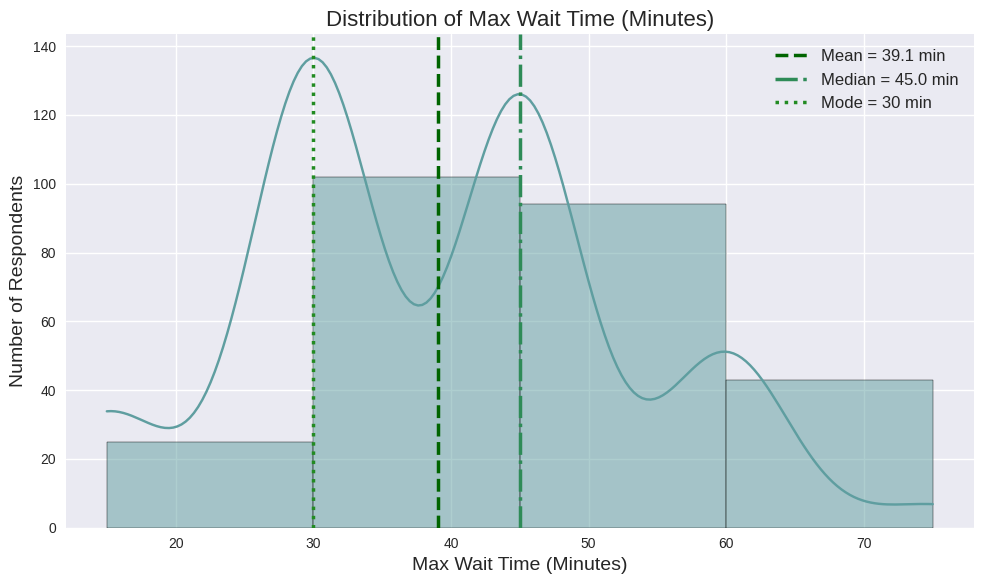

In [57]:
# Basic descriptive statistics
mean_wait = new_version["Max Wait Time (Minutes)"].mean()
median_wait = new_version["Max Wait Time (Minutes)"].median()
mode_wait = new_version["Max Wait Time (Minutes)"].mode()[0]

print(f"Mean Wait Time: {mean_wait:.2f} minutes")
print(f"Median Wait Time: {median_wait:.2f} minutes")
print(f"Most Common Wait Time: {mode_wait} minutes")

# Optional: Grouped by Purchase Decision
grouped_wait = new_version.groupby("Purchase Decision")["Max Wait Time (Minutes)"].mean()
print("\nAverage Wait Time by Purchase Decision:")
print(grouped_wait)

plt.figure(figsize=(10, 6))
sns.histplot(new_version["Max Wait Time (Minutes)"], bins=[15, 30, 45, 60, 75], kde=True, color='cadetblue', edgecolor='black')


# Add vertical lines with increased line width
plt.axvline(mean_wait, color='darkgreen', linestyle='--', linewidth=2.5, label=f'Mean = {mean_wait:.1f} min')
plt.axvline(median_wait, color='seagreen', linestyle='-.', linewidth=2.5, label=f'Median = {median_wait:.1f} min')
plt.axvline(mode_wait, color='forestgreen', linestyle=':', linewidth=2.5, label=f'Mode = {mode_wait} min')

# Labels and title
plt.title("Distribution of Max Wait Time (Minutes)", fontsize=16)
plt.xlabel("Max Wait Time (Minutes)", fontsize=14)
plt.ylabel("Number of Respondents", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


In [58]:

# Define the order of categories
ordered_categories = ['Never', 'Rarely', 'Sometimes', 'Very Often', 'Always']

# List of columns that need to be converted
columns_to_order = [
    'Check Reviews Before Delivery', "Delivery over Cooking",
    "Late Delivery", "Poor Hygiene",
    "Unavailable Demanded Items", "Unaffordable Prices", "Insufficient delivery personnel",
    "Wrong delivery order", "Missing items"
]

# Apply categorical ordering to each column
for col in columns_to_order:
    new_version[col] = pd.Categorical(new_version[col], categories=ordered_categories, ordered=True)

# Verify changes
#print(new_version.dtypes)  # Check the data types to confirm categorical conversion
new_version[col]

,Missing items
0,Sometimes
1,Sometimes
2,Rarely
3,Sometimes
4,Sometimes
...,...
259,Very Often
260,Very Often
261,Very Often
262,Very Often


In [59]:
# Define the order of categories
ordered_categories = ['Not Important', 'Slightly Important', 'Moderately Important', 'Important', 'Very Important']

# List of columns that need to be converted
columns_to_order = [
    "Time-saving", "Good App UI",
    "High-quality products", "Tasty Food", "Many Food Brands", "Easy Payment",
    "Accurate Tracking System", "Friendly delivery personnel", "Fresh food",
    "Appropriate temperature", "High-quality packaging", 'Offers Promotions'
]

# Apply categorical ordering to each column
for col in columns_to_order:
    new_version[col] = pd.Categorical(new_version[col], categories=ordered_categories, ordered=True)

# Verify changes
#print(new_version.dtypes)  # Check the data types to confirm categorical conversion
new_version[col]

,Offers Promotions
0,Moderately Important
1,Moderately Important
2,Slightly Important
3,Important
4,Very Important
...,...
259,Moderately Important
260,Important
261,Moderately Important
262,Very Important


In [60]:
# Define the order of categories
ordered_categories = ['Low traffic','Moderate traffic','High traffic' ]

# List of columns that need to be converted
columns_to_order = [
     'Area Type'
]

# Apply categorical ordering to each column
for col in columns_to_order:
    new_version[col] = pd.Categorical(new_version[col], categories=ordered_categories, ordered=True)

# Verify changes
#print(new_version.dtypes)  # Check the data types to confirm categorical conversion
new_version[col]

,Area Type
0,High traffic
1,Moderate traffic
2,Moderate traffic
3,Moderate traffic
4,Moderate traffic
...,...
259,Moderate traffic
260,High traffic
261,Moderate traffic
262,Moderate traffic


In [61]:
# Assuming 'df' is your DataFrame and you want value counts for all columns
for col in new_version.columns:
    print(f"{col}:\n{new_version[col].value_counts()}\n")

Meal Type:
Meal Type
Lunch        129
Dinner        76
Snacks        32
Breakfast     27
Name: count, dtype: int64

Preferred Order Time:
Preferred Order Time
Anytime     148
Weekend      87
Weekdays     29
Name: count, dtype: int64

Max Wait Time:
Max Wait Time
30 minutes          102
45 minutes           94
1 hour               38
15 minutes           25
More than 1 hour      5
Name: count, dtype: int64

Check Reviews Before Delivery:
Check Reviews Before Delivery
Sometimes     127
Very Often     53
Rarely         47
Always         29
Never           8
Name: count, dtype: int64

Delivery over Cooking:
Delivery over Cooking
Sometimes     158
Rarely         51
Very Often     37
Always         12
Never           6
Name: count, dtype: int64

Good App UI:
Good App UI
Important               113
Very Important           77
Moderately Important     46
Slightly Important       21
Not Important             7
Name: count, dtype: int64

Time-saving:
Time-saving
Important               119
Very 

In [62]:
# Define the order of categories
ordered_categories = ['Under 18','18-24', '25-34', '35-44', '45+' ]

# List of columns that need to be converted
columns_to_order = [
     'Age'
]

# Apply categorical ordering to each column
for col in columns_to_order:
    new_version[col] = pd.Categorical(new_version[col], categories=ordered_categories, ordered=True)

# Verify changes
#print(new_version.dtypes)  # Check the data types to confirm categorical conversion
new_version[col]

,Age
0,18-24
1,18-24
2,18-24
3,18-24
4,18-24
...,...
259,35-44
260,35-44
261,35-44
262,35-44


# Encoding

In [63]:

# Convert categorical column to numerical values
new_version["Max Wait Time"] = new_version["Max Wait Time"].cat.codes

# Verify changes
#print(new_version.dtypes)  # Check the data types to confirm conversion
new_version[col]  # Display the updated column

,Age
0,18-24
1,18-24
2,18-24
3,18-24
4,18-24
...,...
259,35-44
260,35-44
261,35-44
262,35-44


In [64]:
categorical_col = []
for column in new_version.columns:
    if new_version[column].dtype == object or str(new_version[column].dtype) == 'category':
        categorical_col.append(column)
        print(f"{column} : {new_version[column].unique()}")
        print("====================================")
        print("====================================")

Meal Type : ['Lunch' 'Breakfast' 'Snacks' 'Dinner']
Preferred Order Time : ['Weekend' 'Anytime' 'Weekdays']
Check Reviews Before Delivery : ['Very Often', 'Sometimes', 'Rarely', 'Always', 'Never']
Categories (5, object): ['Never' < 'Rarely' < 'Sometimes' < 'Very Often' < 'Always']
Delivery over Cooking : ['Sometimes', 'Very Often', 'Rarely', 'Never', 'Always']
Categories (5, object): ['Never' < 'Rarely' < 'Sometimes' < 'Very Often' < 'Always']
Good App UI : ['Moderately Important', 'Very Important', 'Important', 'Slightly Important', 'Not Important']
Categories (5, object): ['Not Important' < 'Slightly Important' < 'Moderately Important' < 'Important' <
                         'Very Important']
Time-saving : ['Important', 'Very Important', 'Moderately Important', 'Not Important', 'Slightly Important']
Categories (5, object): ['Not Important' < 'Slightly Important' < 'Moderately Important' < 'Important' <
                         'Very Important']
High-quality products : ['Moderately I

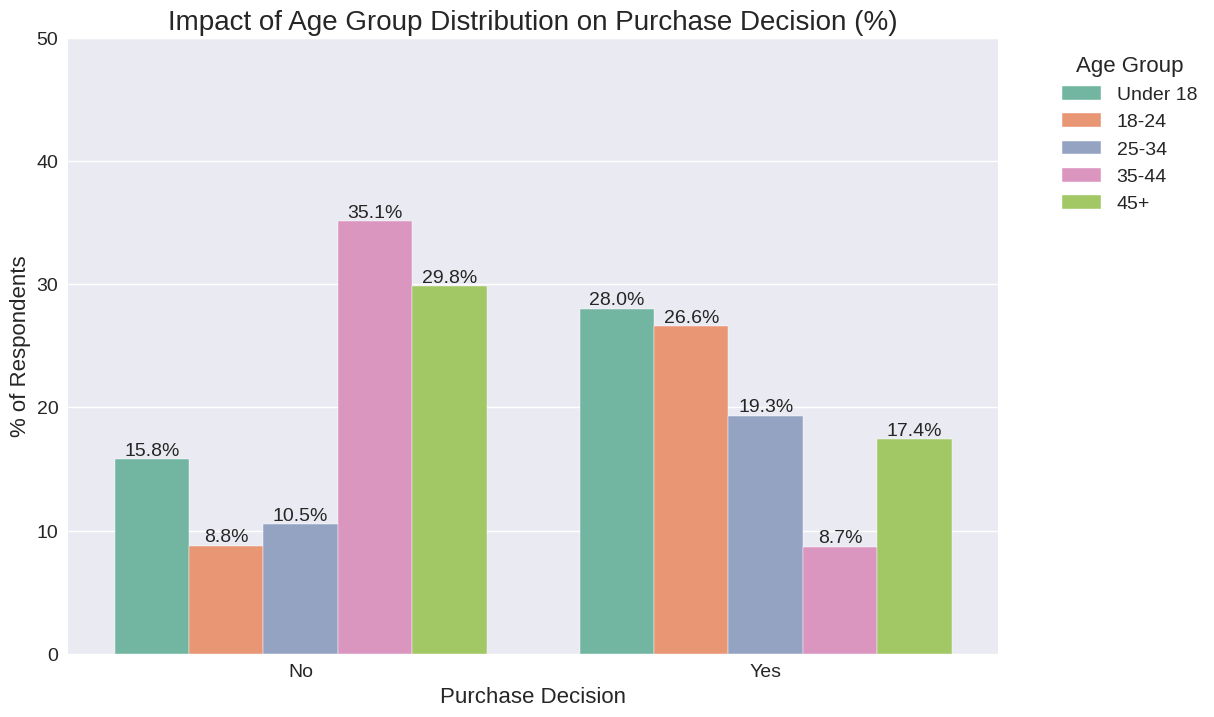

In [65]:

import seaborn as sns
import matplotlib.pyplot as plt

age_order = ['Under 18', '18-24', '25-34', '35-44', '45+']

# Step 1: Calculate percentage per Purchase Decision and Age
# Create a crosstab
ct = pd.crosstab(new_version['Purchase Decision'], new_version['Age'])

# Step 2: Normalize (make percentages)
ct_percent = ct.div(ct.sum(axis=1), axis=0) * 100

# Step 3: Melt the dataframe for easier Seaborn plotting
ct_percent = ct_percent.reset_index().melt(id_vars='Purchase Decision', var_name='Age', value_name='% of Respondents')

# Plot
plt.figure(figsize=(12,8))  # Bigger figure
ax = sns.barplot(
    x='Purchase Decision', y='% of Respondents', hue='Age', data=ct_percent,
    palette='Set2', hue_order=age_order
)

plt.title('Impact of Age Group Distribution on Purchase Decision (%)', fontsize=20)
plt.xlabel('Purchase Decision', fontsize=16)
plt.ylabel('% of Respondents', fontsize=16)
plt.xticks([0,1], ['No', 'Yes'], fontsize=14)
plt.yticks(fontsize=14)
plt.legend(title='Age Group', fontsize=14, title_fontsize=16, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylim(0, 50)

# OPTIONAL: Add labels on bars
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height:.1f}%',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=14)

plt.show()




In [67]:
categorical_features = categorical_col.copy()

In [68]:
df_encoded = new_version.copy()

In [86]:
df_encoded['Purchase Decision'] = df_encoded['Purchase Decision'].astype('category').cat.codes
df_encoded['Purchase Decision']

,Purchase Decision
0,0
1,1
2,1
3,1
4,1
...,...
259,0
260,0
261,0
262,0


In [66]:
new_version['Purchase Decision'].value_counts() / new_version['Purchase Decision'].count()

,count
Purchase Decision,
Yes,0.784091
No,0.215909


In [69]:
df_encoded.drop('Max Wait Time (Minutes)', axis=1, inplace=True)


In [70]:
categorical_columns = ['Marital Status', 'Occupation','Gender', 'Meal Type', 'Preferred Order Time']
df_encoded = pd.get_dummies(data=df_encoded, columns=categorical_columns)

In [71]:

from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
columns_to_order = [
    "Time-saving", "Delivery over Cooking", "Good App UI",
    "High-quality products", "Tasty Food", "Many Food Brands", "Easy Payment",
    "Accurate Tracking System", "Friendly delivery personnel", "Fresh food",
    "Appropriate temperature", "High-quality packaging", "Age", "Max Wait Time",
    "Area Type", 'Offers Promotions', 'Late Delivery', 'Poor Hygiene',
    'Unavailable Demanded Items', 'Unaffordable Prices', 'Insufficient delivery personnel',
    'Wrong delivery order', 'Missing items', 'Check Reviews Before Delivery'
]

# Apply categorical ordering to each column
for col in columns_to_order:
   df_encoded[col] = label.fit_transform(df_encoded[col])

# Data reduction

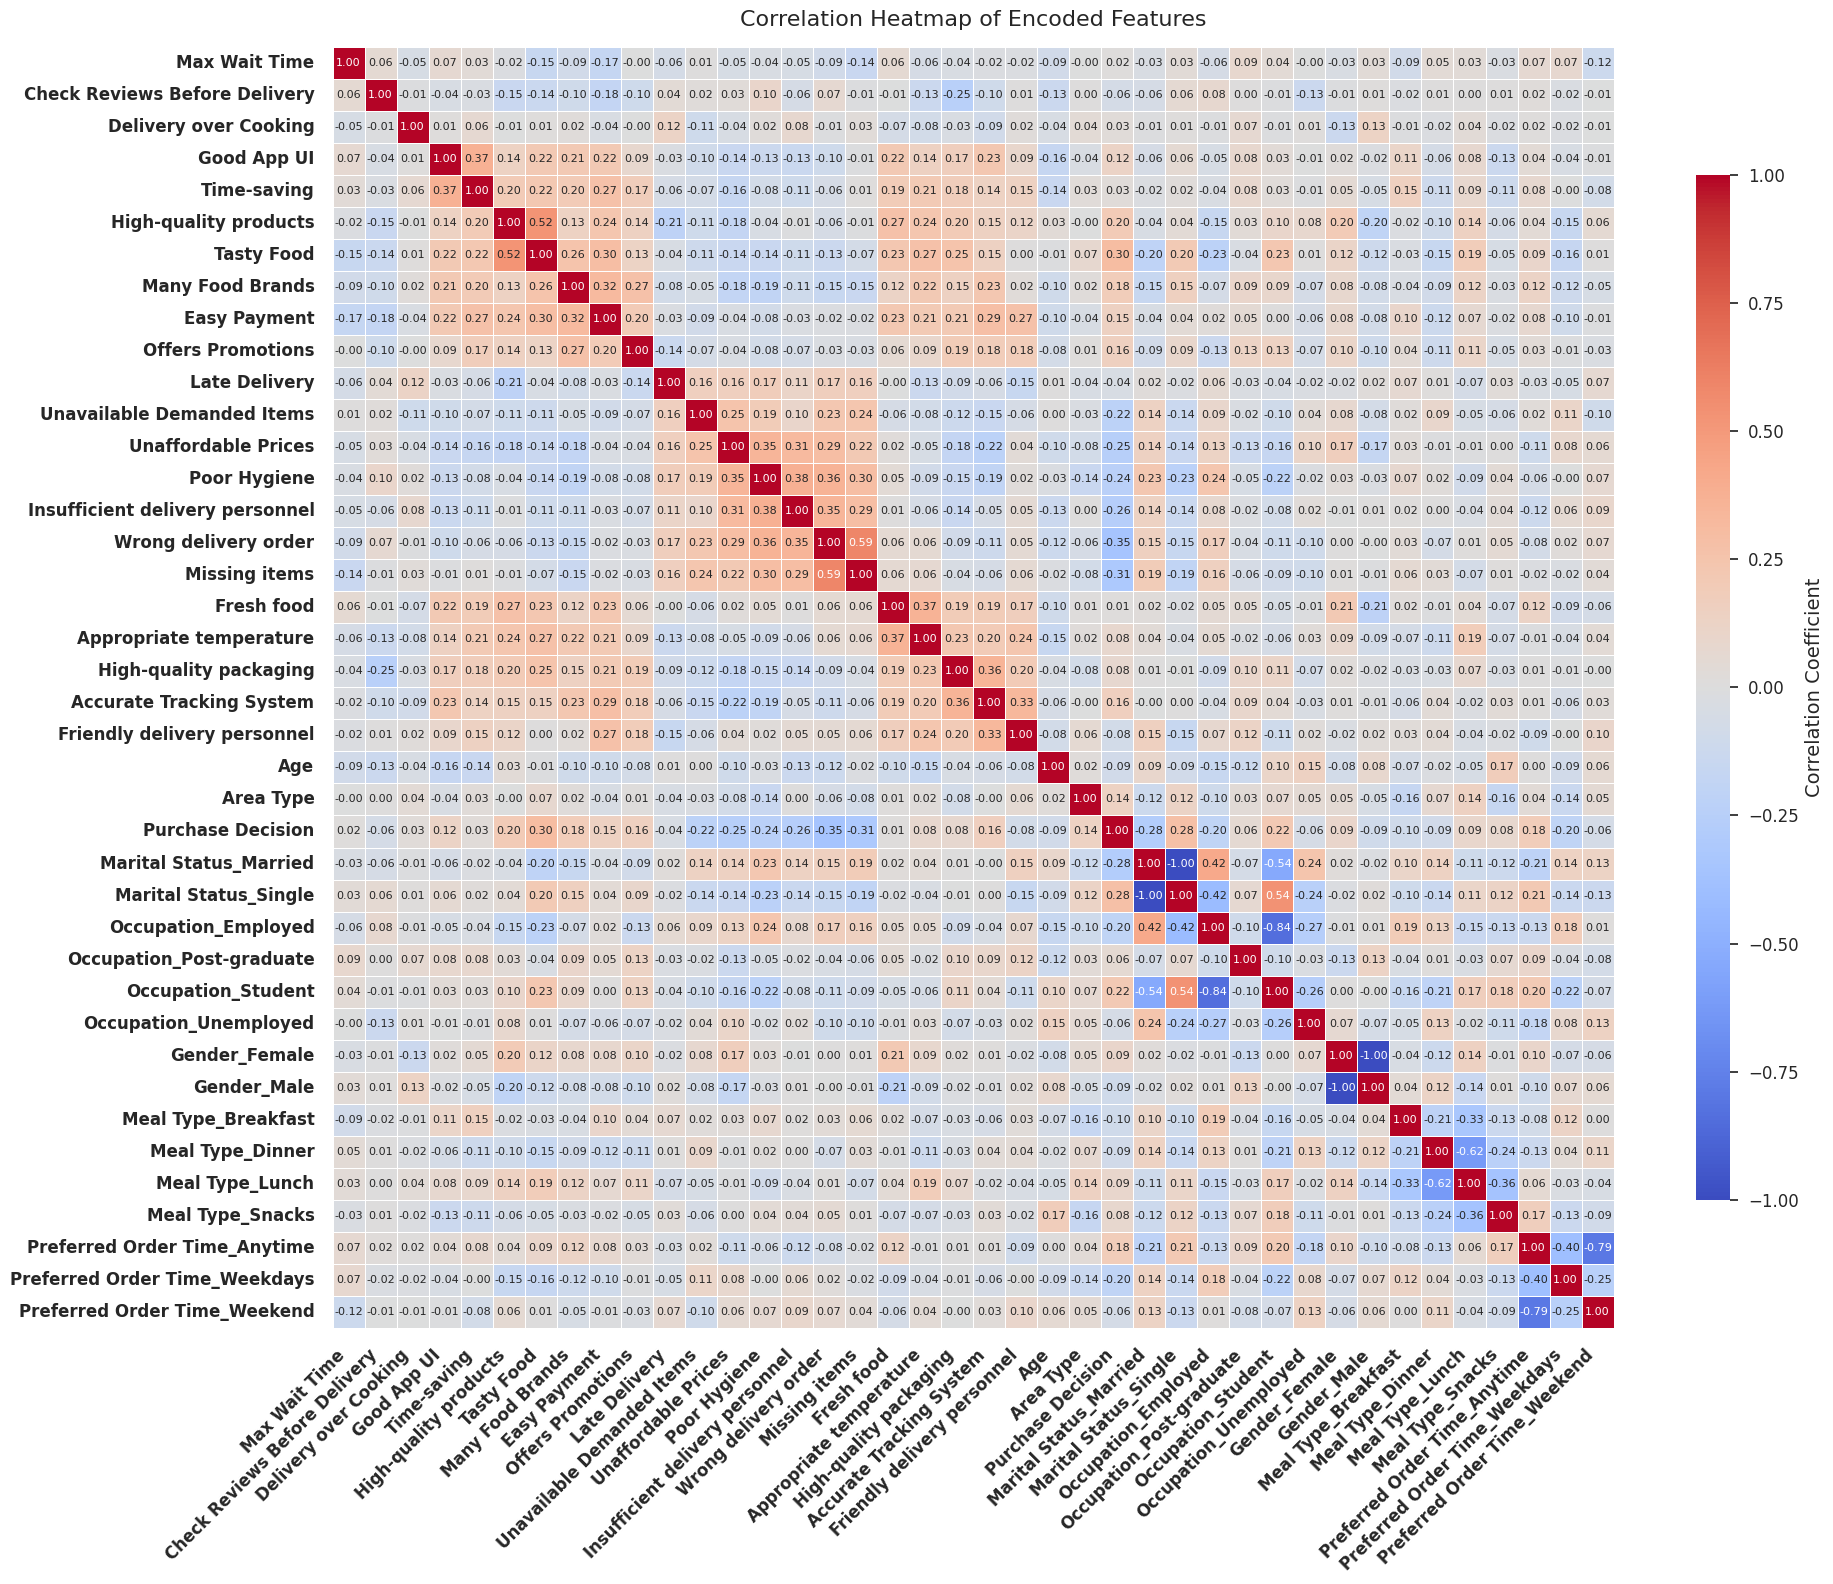

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation matrix
corr = df_encoded.corr(numeric_only=True)

# Set figure size and font scale
plt.figure(figsize=(20, 16))
sns.set(font_scale=1.0)

# Create heatmap
heatmap = sns.heatmap(
    corr,
    cmap='coolwarm',  # Change color scheme if preferred
    annot=True,
    fmt='.2f',
    square=True,
    linewidths=0.5,
    annot_kws={"size": 8},
    cbar_kws={
        "shrink": 0.8,         # Shrinks the color bar size relative to the heatmap
        "label": "Correlation",# Label for the color scale
        "aspect": 30           # Thickness of the colorbar
    }
)

# Improve color bar font size and readability
colorbar = heatmap.collections[0].colorbar
colorbar.ax.tick_params(labelsize=12)  # Make colorbar ticks larger
colorbar.set_label("Correlation Coefficient", fontsize=14)

# Axis formatting
plt.xticks(rotation=45, ha='right', fontsize=12, weight='bold')
plt.yticks(rotation=0, fontsize=12, weight='bold')
plt.title('Correlation Heatmap of Encoded Features', fontsize=16, pad=15)
plt.tight_layout()
plt.show()


In [89]:
encoded_copy= df_encoded.copy()

In [90]:
encoded_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 40 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   Max Wait Time                    264 non-null    int64
 1   Check Reviews Before Delivery    264 non-null    int64
 2   Delivery over Cooking            264 non-null    int64
 3   Good App UI                      264 non-null    int64
 4   Time-saving                      264 non-null    int64
 5   High-quality products            264 non-null    int64
 6   Tasty Food                       264 non-null    int64
 7   Many Food Brands                 264 non-null    int64
 8   Easy Payment                     264 non-null    int64
 9   Offers Promotions                264 non-null    int64
 10  Late Delivery                    264 non-null    int64
 11  Unavailable Demanded Items       264 non-null    int64
 12  Unaffordable Prices              264 non-null    i

In [91]:
low_importance_features = [
    'Occupation_Post-graduate',
    'Meal Type_Breakfast',
    'Meal Type_Snacks',
    'Preferred Order Time_Weekdays',
    'Preferred Order Time_Weekend',
    'Occupation_Unemployed'
]

df_reduced = encoded_copy.drop(columns=low_importance_features)


In [92]:
encoded_copy.drop(columns=low_importance_features, inplace=True)

The heatmap and feature importance analysis helped in determing the low importance variables to remove

# Model training & testing

In [93]:
from sklearn.model_selection import train_test_split

X7 = encoded_copy.drop('Purchase Decision',axis=1) # Independent variable
y7 = encoded_copy['Purchase Decision'] # Dependent variable

X_train7, X_test7, y_train7, y_test7 = train_test_split(X7, y7, test_size=0.25, random_state=42)

print('Training dataset size:', X_train7.shape[0])
print('Testing dataset size:', X_test7.shape[0])

Training dataset size: 198
Testing dataset size: 66


In [94]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

clf7 = DecisionTreeClassifier(random_state=42)

# since we have a relatively small dataset (~1000 records),
# we'll use a low number of splits
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Grid search hyperparameters
param_grid = {
    'max_depth': [5, 10, None],
    'class_weight': ['balanced']
}
# Note how cross validation is applied on the training dataset
# The testing dataset is always left out and used -only- in the final evaluation
grid_searchDT2 = GridSearchCV(estimator=clf7, param_grid=param_grid, cv=skf, scoring='accuracy')

# Fit the model
grid_searchDT2.fit(X_train7, y_train7)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'class_weight': ['balanced'],
                         'max_depth': [5, 10, None]},
             scoring='accuracy')

In [95]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Call print_score with the best estimator from GridSearchCV
best_modelDT2 = grid_searchDT2.best_estimator_

def print_scoreDT2(best_modelDT2, X_train7, y_train7, X_test7, y_test7, train=True):
    if train:
        pred = best_modelDT2.predict(X_train7)
        clf_report = pd.DataFrame(classification_report(y_train7, pred, output_dict=True))
        print("Train Result:")
        print("===============================================")
        print(f"Accuracy Score: {accuracy_score(y_train7, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train7, pred)}\n")

    elif train==False:
        pred = best_modelDT2.predict(X_test7)
        clf_report = pd.DataFrame(classification_report(y_test7, pred, output_dict=True))
        print("Test Result:")
        print("===============================================")
        print(f"Accuracy Score: {accuracy_score(y_test7, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test7, pred)}\n")

print_scoreDT2(best_modelDT2, X_train7, y_train7, X_test7, y_test7, train=True)
print_scoreDT2(best_modelDT2, X_train7, y_train7, X_test7, y_test7, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
              0      1  accuracy  macro avg  weighted avg
precision   1.0    1.0       1.0        1.0           1.0
recall      1.0    1.0       1.0        1.0           1.0
f1-score    1.0    1.0       1.0        1.0           1.0
support    44.0  154.0       1.0      198.0         198.0
_______________________________________________
Confusion Matrix: 
 [[ 44   0]
 [  0 154]]

Test Result:
Accuracy Score: 80.30%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.500000   0.884615   0.80303   0.692308      0.808858
recall      0.538462   0.867925   0.80303   0.703193      0.803030
f1-score    0.518519   0.876190   0.80303   0.697354      0.805740
support    13.000000  53.000000   0.80303  66.000000     66.000000
_______________________________________________
Confusion Matrix: 


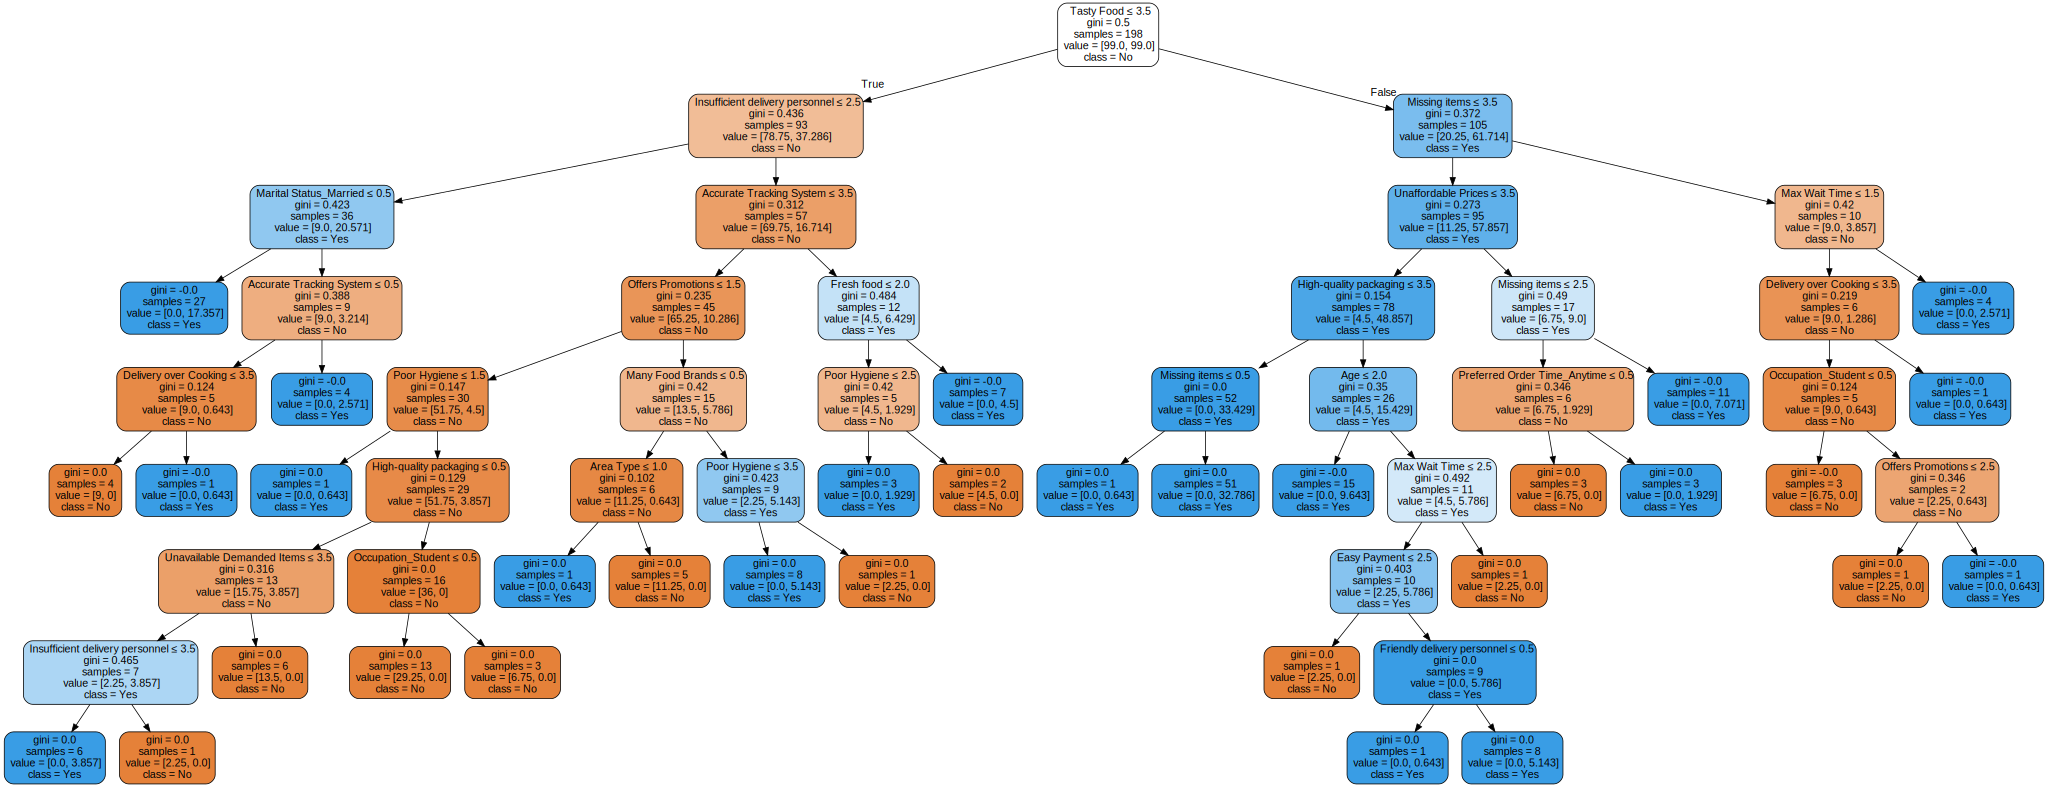

In [ ]:
#This code works on google colab
# First, install the graphviz package
!pip install graphviz

import graphviz
from sklearn.tree import export_graphviz


dot_data = export_graphviz(best_modelDT2, out_file=None,
                           feature_names=X7.columns,
                           class_names=['No', 'Yes'],
                           filled=True, rounded=True,
                           special_characters=True)

# Create a graph from the dot data
graph = graphviz.Source(dot_data)

# Display the graph(uncomment the below line)
graph

In [96]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

rf_clf8 = RandomForestClassifier(random_state=42)


skf = StratifiedKFold(n_splits=10)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5],
    'class_weight': ['balanced']
}

grid_searchRF1 = GridSearchCV(estimator=rf_clf8, param_grid=param_grid, cv=skf, scoring='accuracy')

grid_searchRF1.fit(X_train7, y_train7)
# Note how cross validation is applied on the training dataset
# The testing dataset is always left out and used -only- in the final evaluation

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(random_state=42),
             param_grid={'class_weight': ['balanced'],
                         'max_depth': [None, 5, 10, 15],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [97]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Call print_score with the best estimator from GridSearchCV
best_modelRF2 = grid_searchRF1.best_estimator_

def print_scoreRF2(best_modelRF2, X_train7, y_train7, X_test7, y_test7, train=True):
    if train:
        pred = best_modelRF2.predict(X_train7)
        clf_report = pd.DataFrame(classification_report(y_train7, pred, output_dict=True))
        print("Train Result:")
        print("===============================================")
        print(f"Accuracy Score: {accuracy_score(y_train7, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train7, pred)}\n")

    elif train==False:
        pred = best_modelRF2.predict(X_test7)
        clf_report = pd.DataFrame(classification_report(y_test7, pred, output_dict=True))
        print("Test Result:")
        print("===============================================")
        print(f"Accuracy Score: {accuracy_score(y_test7, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test7, pred)}\n")

print_scoreRF2(best_modelRF2, X_train7, y_train7, X_test7, y_test7, train=True)
print_scoreRF2(best_modelRF2, X_train7, y_train7, X_test7, y_test7, train=False)

Train Result:
Accuracy Score: 99.49%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.977778    1.000000  0.994949    0.988889      0.995062
recall      1.000000    0.993506  0.994949    0.996753      0.994949
f1-score    0.988764    0.996743  0.994949    0.992753      0.994970
support    44.000000  154.000000  0.994949  198.000000    198.000000
_______________________________________________
Confusion Matrix: 
 [[ 44   0]
 [  1 153]]

Test Result:
Accuracy Score: 90.91%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.888889   0.912281  0.909091   0.900585      0.907673
recall      0.615385   0.981132  0.909091   0.798258      0.909091
f1-score    0.727273   0.945455  0.909091   0.836364      0.902479
support    13.000000  53.000000  0.909091  66.000000     66.000000
_____________

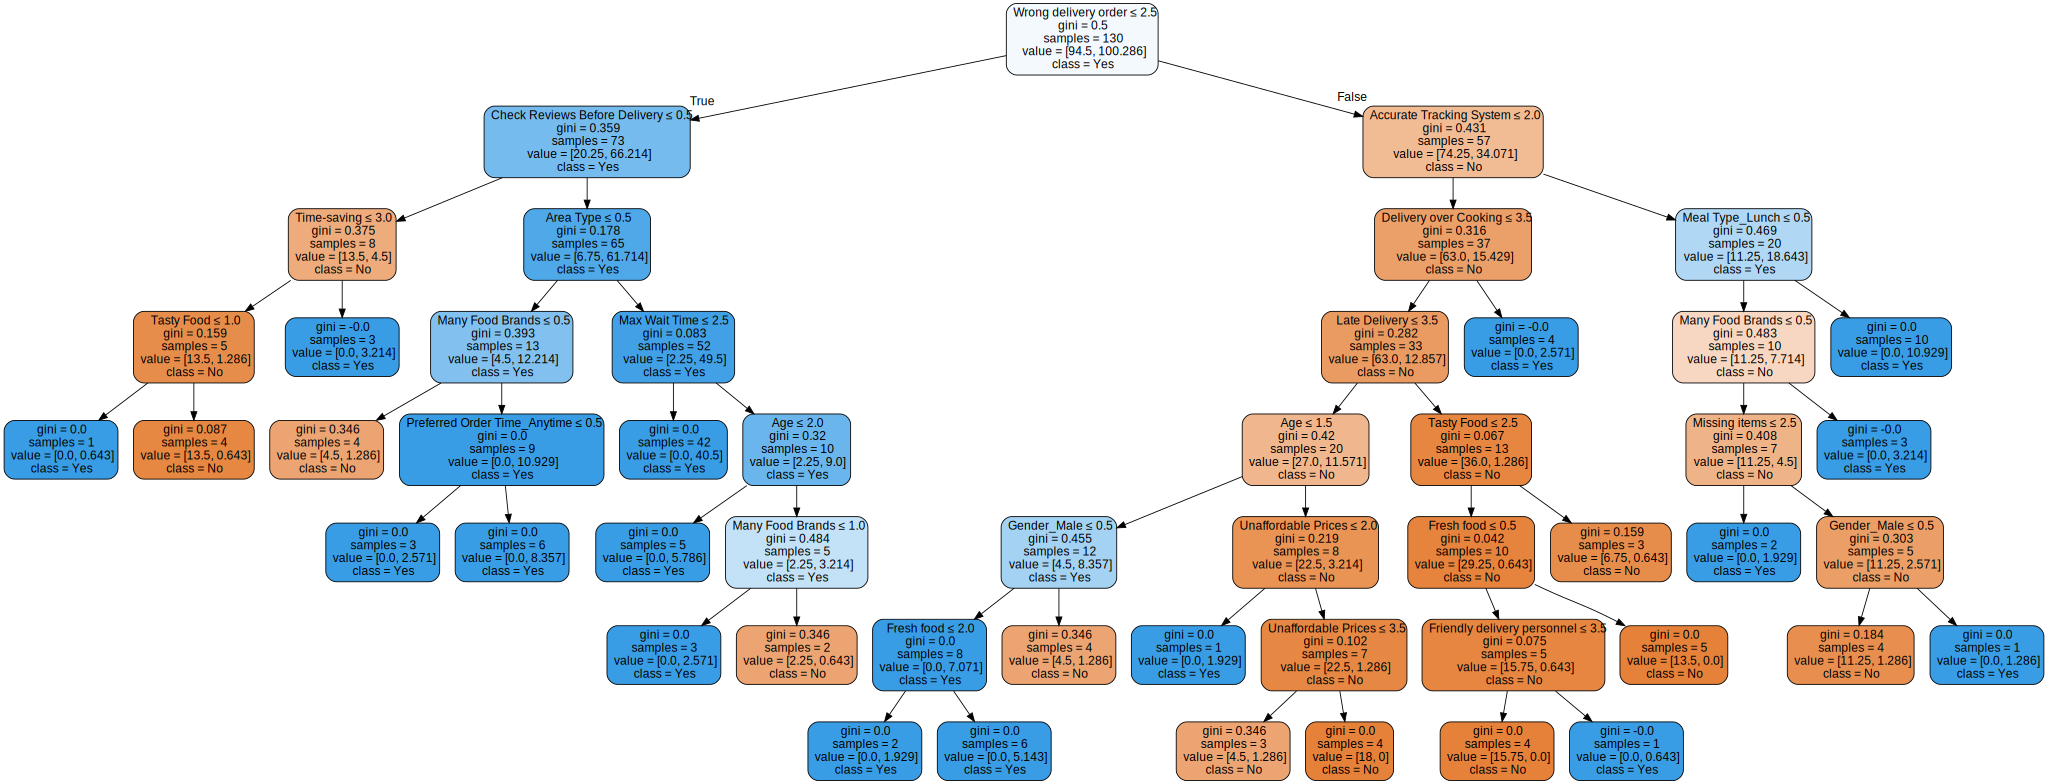

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

# Select the first tree in the Random Forest
first_tree = best_modelRF2.estimators_[0]

# Export as dot file
dot_data = export_graphviz(first_tree, out_file=None,
                           feature_names=X7.columns,
                           class_names=['No', 'Yes'],
                           filled=True, rounded=True,
                           special_characters=True)

# Create a graph from dot_data
graph = graphviz.Source(dot_data)
graph

In [98]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Define KNN model
knn4 = KNeighborsClassifier()

# Stratified 10-fold cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Define parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Set up grid search
grid_search_knn1 = GridSearchCV(estimator=knn4, param_grid=param_grid, cv=cv, scoring='accuracy')

# Fit on training data
grid_search_knn1.fit(X_train7, y_train7)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [99]:
best_modelKNN = grid_search_knn1.best_estimator_
def print_scoreKNN1(best_modelKNN, X_train7, y_train7, X_test7, y_test7, train=True):
    if train:
        pred = best_modelKNN.predict(X_train7)
        clf_report = pd.DataFrame(classification_report(y_train7, pred, output_dict=True))
        print("Train Result:")
        print("===============================================")
        print(f"Accuracy Score: {accuracy_score(y_train7, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train7, pred)}\n")

    elif train==False:
        pred = best_modelKNN.predict(X_test7)
        clf_report = pd.DataFrame(classification_report(y_test7, pred, output_dict=True))
        print("Test Result:")
        print("===============================================")
        print(f"Accuracy Score: {accuracy_score(y_test7, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test7, pred)}\n")

print_scoreKNN1(best_modelKNN, X_train7, y_train7, X_test7, y_test7, train=True)
print_scoreKNN1(best_modelKNN, X_train7, y_train7, X_test7, y_test7, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
              0      1  accuracy  macro avg  weighted avg
precision   1.0    1.0       1.0        1.0           1.0
recall      1.0    1.0       1.0        1.0           1.0
f1-score    1.0    1.0       1.0        1.0           1.0
support    44.0  154.0       1.0      198.0         198.0
_______________________________________________
Confusion Matrix: 
 [[ 44   0]
 [  0 154]]

Test Result:
Accuracy Score: 89.39%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.750000   0.925926  0.893939   0.837963      0.891274
recall      0.692308   0.943396  0.893939   0.817852      0.893939
f1-score    0.720000   0.934579  0.893939   0.827290      0.892314
support    13.000000  53.000000  0.893939  66.000000     66.000000
_______________________________________________
Confusion Matrix: 


In [100]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Define GBM model
gbm1 = GradientBoostingClassifier(random_state=42)

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0]
}

# Set up cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Set up grid search
grid_search_gbm1 = GridSearchCV(estimator=gbm1, param_grid=param_grid, cv=cv, scoring='accuracy')

# Fit on training data
grid_search_gbm1.fit(X_train7, y_train7)

# Access best model
best_gbm1 = grid_search_gbm1.best_estimator_

In [101]:
def print_scoreGBM1(best_gbm1, X_train7, y_train7, X_test7, y_test7, train=True):
    if train:
        pred = best_gbm1.predict(X_train7)
        clf_report = pd.DataFrame(classification_report(y_train7, pred, output_dict=True))
        print("Train Result:")
        print("===============================================")
        print(f"Accuracy Score: {accuracy_score(y_train7, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train7, pred)}\n")

    elif train==False:
        pred = best_gbm1.predict(X_test7)
        clf_report = pd.DataFrame(classification_report(y_test7, pred, output_dict=True))
        print("Test Result:")
        print("===============================================")
        print(f"Accuracy Score: {accuracy_score(y_test7, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test7, pred)}\n")

print_scoreGBM1(best_gbm1, X_train7, y_train7, X_test7, y_test7, train=True)
print_scoreGBM1(best_gbm1, X_train7, y_train7, X_test7, y_test7, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
              0      1  accuracy  macro avg  weighted avg
precision   1.0    1.0       1.0        1.0           1.0
recall      1.0    1.0       1.0        1.0           1.0
f1-score    1.0    1.0       1.0        1.0           1.0
support    44.0  154.0       1.0      198.0         198.0
_______________________________________________
Confusion Matrix: 
 [[ 44   0]
 [  0 154]]

Test Result:
Accuracy Score: 92.42%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.900000   0.928571  0.924242   0.914286      0.922944
recall      0.692308   0.981132  0.924242   0.836720      0.924242
f1-score    0.782609   0.954128  0.924242   0.868369      0.920344
support    13.000000  53.000000  0.924242  66.000000     66.000000
_______________________________________________
Confusion Matrix: 


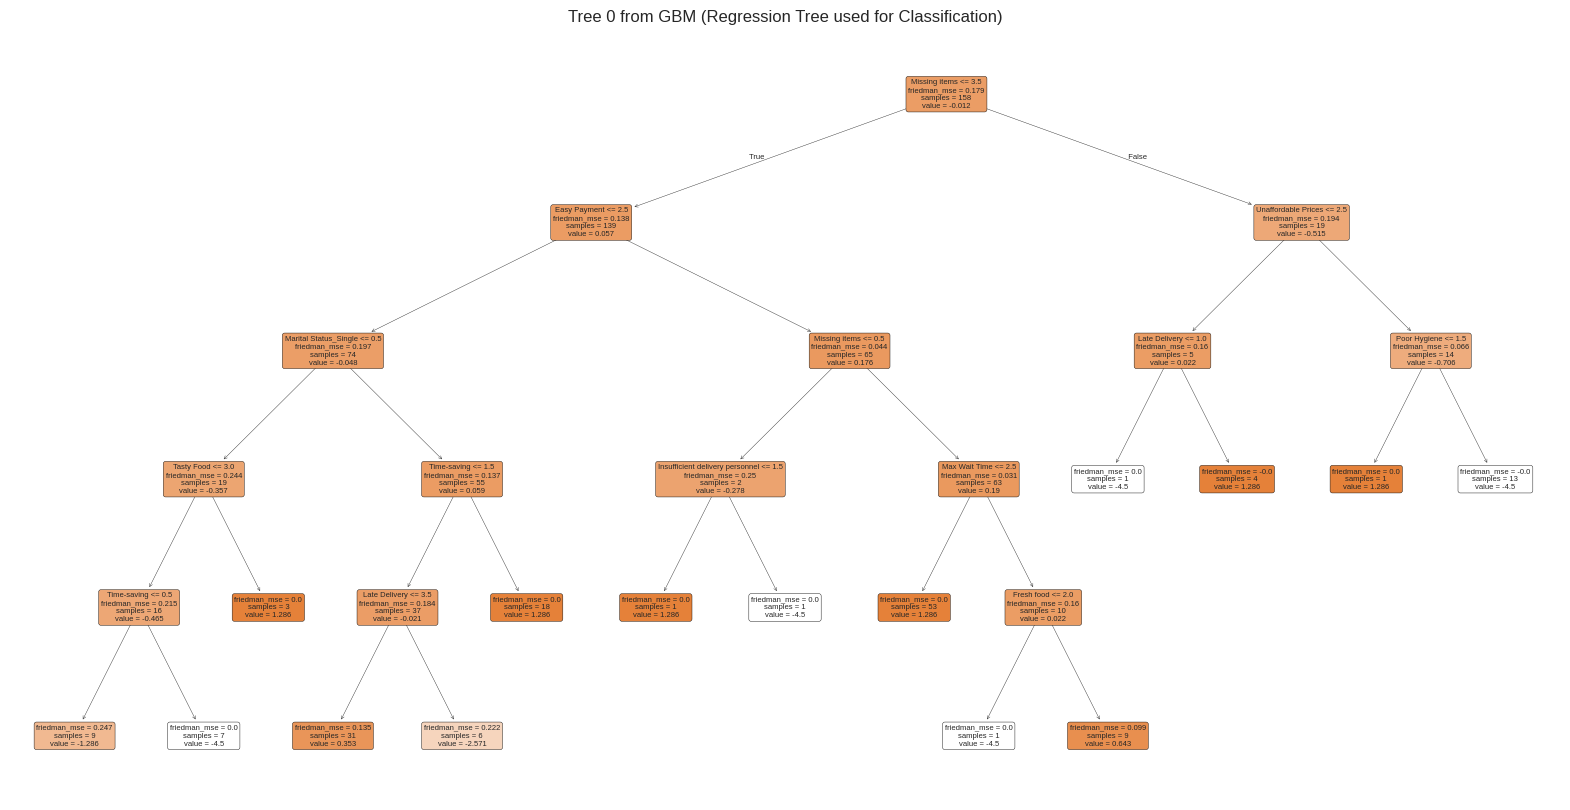

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the first estimator from the ensemble
plt.figure(figsize=(20, 10))
plot_tree(best_gbm1.estimators_[0, 0],
          feature_names=X7.columns,
          filled=True,
          rounded=True)
plt.title("Tree 0 from GBM (Regression Tree used for Classification)")
plt.show()

In [102]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Define base SVM model
svm1 = SVC(random_state=42)

# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto'],
    'class_weight': ['balanced']
}

# Define stratified 10-fold cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Set up grid search
grid_search_svm1 = GridSearchCV(estimator=svm1, param_grid=param_grid, cv=cv, scoring='accuracy')

# Fit on training data
grid_search_svm1.fit(X_train7, y_train7)

# Get best model
best_svm1= grid_search_svm1.best_estimator_

In [103]:
def print_scoreSVM1(best_svm1, X_train7, y_train7, X_test7, y_test7, train=True):
    if train:
        pred = best_svm1.predict(X_train7)
        clf_report = pd.DataFrame(classification_report(y_train7, pred, output_dict=True))
        print("Train Result:")
        print("===============================================")
        print(f"Accuracy Score: {accuracy_score(y_train7, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train7, pred)}\n")

    elif train==False:
        pred = best_svm1.predict(X_test7)
        clf_report = pd.DataFrame(classification_report(y_test7, pred, output_dict=True))
        print("Test Result:")
        print("===============================================")
        print(f"Accuracy Score: {accuracy_score(y_test7, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test7, pred)}\n")

print_scoreSVM1(best_svm1, X_train7, y_train7, X_test7, y_test7, train=True)
print_scoreSVM1(best_svm1, X_train7, y_train7, X_test7, y_test7, train=False)

Train Result:
Accuracy Score: 99.49%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.977778    1.000000  0.994949    0.988889      0.995062
recall      1.000000    0.993506  0.994949    0.996753      0.994949
f1-score    0.988764    0.996743  0.994949    0.992753      0.994970
support    44.000000  154.000000  0.994949  198.000000    198.000000
_______________________________________________
Confusion Matrix: 
 [[ 44   0]
 [  1 153]]

Test Result:
Accuracy Score: 86.36%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.666667   0.907407  0.863636   0.787037      0.859989
recall      0.615385   0.924528  0.863636   0.769956      0.863636
f1-score    0.640000   0.915888  0.863636   0.777944      0.861546
support    13.000000  53.000000  0.863636  66.000000     66.000000
_____________

In [104]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Calculate class imbalance ratio
imbalance_ratio = y_train7.value_counts()[0] / y_train7.value_counts()[1]

# Base XGBoost model
xgb1 = XGBClassifier(
    random_state=42,
    use_label_encoder=True,
    eval_metric='logloss',
    scale_pos_weight=imbalance_ratio
)

# Parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0]
}

# 10-fold stratified cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Grid Search
grid_search_xgb1 = GridSearchCV(estimator=xgb1, param_grid=param_grid, cv=cv, scoring='accuracy')
grid_search_xgb1.fit(X_train7, y_train7)

# Best model
best_xgb1 = grid_search_xgb1.best_estimator_

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:24:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:24:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:24:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:24:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:24:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

In [105]:
def print_scoreXGB1(best_xgb1, X_train7, y_train7, X_test7, y_test7, train=True):
    if train:
        pred = best_xgb1.predict(X_train7)
        clf_report = pd.DataFrame(classification_report(y_train7, pred, output_dict=True))
        print("Train Result:")
        print("===============================================")
        print(f"Accuracy Score: {accuracy_score(y_train7, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train7, pred)}\n")

    elif train==False:
        pred = best_xgb1.predict(X_test7)
        clf_report = pd.DataFrame(classification_report(y_test7, pred, output_dict=True))
        print("Test Result:")
        print("===============================================")
        print(f"Accuracy Score: {accuracy_score(y_test7, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test7, pred)}\n")

print_scoreXGB1(best_xgb1, X_train7, y_train7, X_test7, y_test7, train=True)
print_scoreXGB1(best_xgb1, X_train7, y_train7, X_test7, y_test7, train=False)


Train Result:
Accuracy Score: 99.49%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.977778    1.000000  0.994949    0.988889      0.995062
recall      1.000000    0.993506  0.994949    0.996753      0.994949
f1-score    0.988764    0.996743  0.994949    0.992753      0.994970
support    44.000000  154.000000  0.994949  198.000000    198.000000
_______________________________________________
Confusion Matrix: 
 [[ 44   0]
 [  1 153]]

Test Result:
Accuracy Score: 86.36%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.625000   0.940000  0.863636   0.782500      0.877955
recall      0.769231   0.886792  0.863636   0.828012      0.863636
f1-score    0.689655   0.912621  0.863636   0.801138      0.868704
support    13.000000  53.000000  0.863636  66.000000     66.000000
_____________

In [106]:
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.ensemble import BaggingClassifier

bagged_tree = BaggingClassifier(
    estimator=DecisionTreeClassifier(max_depth=3, criterion='entropy'),
    n_estimators=10,
    random_state=42
)

# Cross-validation strategy
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Grid search: only tuning low-complexity parameters (rule-based intent)
param_grid = {
    'estimator__max_depth': [3, 4, 5],
    'estimator__min_samples_split': [2, 5],
    'estimator__min_samples_leaf': [2, 4, 6]
}

grid_search_rule3 = GridSearchCV(
    estimator=bagged_tree,
    param_grid=param_grid,
    cv=skf,
    scoring='accuracy',
    n_jobs=-1
)

# Fit model on training data
grid_search_rule3.fit(X_train7, y_train7)

# Best model
best_rule_tree3 = grid_search_rule3.best_estimator_

# Predict and evaluate
y_pred = best_rule_tree3.predict(X_test7)
y_probs = best_rule_tree3.predict_proba(X_test7)[:, 1]
custom_preds = (y_probs > 0.4).astype(int)

print(f"Accuracy:  {accuracy_score(y_test7, y_pred):.2f}")
print(f"Precision: {precision_score(y_test7, y_pred):.2f}")
print(f"Recall:    {recall_score(y_test7, y_pred):.2f}")
print(f"F1 Score:  {f1_score(y_test7, y_pred):.2f}\n")

print("Classification Report:\n")
print(classification_report(y_test7, y_pred))

# Access one of the individual estimators (e.g., the first tree)
first_tree = best_rule_tree3.estimators_[0]

# Print its rules
print(export_text(first_tree, feature_names=list(X_train7.columns)))





Accuracy:  0.83
Precision: 0.86
Recall:    0.94
F1 Score:  0.90

Classification Report:

              precision    recall  f1-score   support

           0       0.62      0.38      0.48        13
           1       0.86      0.94      0.90        53

    accuracy                           0.83        66
   macro avg       0.74      0.66      0.69        66
weighted avg       0.82      0.83      0.82        66

|--- Missing items <= 3.50
|   |--- Marital Status_Single <= 0.50
|   |   |--- Tasty Food <= 3.00
|   |   |   |--- class: 0
|   |   |--- Tasty Food >  3.00
|   |   |   |--- class: 1
|   |--- Marital Status_Single >  0.50
|   |   |--- Insufficient delivery personnel <= 2.50
|   |   |   |--- class: 1
|   |   |--- Insufficient delivery personnel >  2.50
|   |   |   |--- class: 1
|--- Missing items >  3.50
|   |--- Unaffordable Prices <= 2.50
|   |   |--- class: 1
|   |--- Unaffordable Prices >  2.50
|   |   |--- Unavailable Demanded Items <= 3.50
|   |   |   |--- class: 0
|   |   

# Confusion Matrices

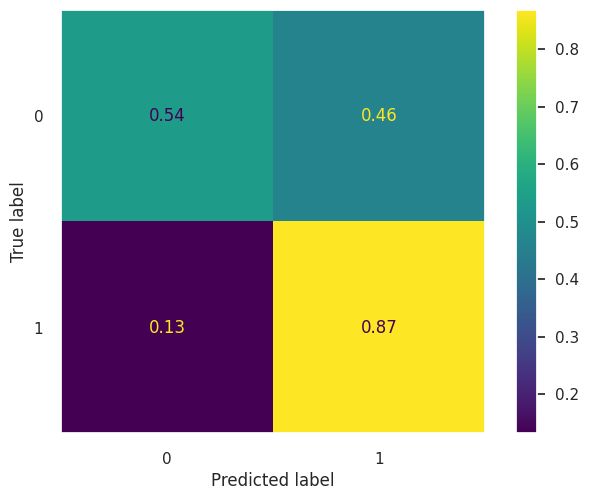

In [107]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test7, best_modelDT2.predict(X_test7), labels=best_modelDT2.classes_,normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=best_modelDT2.classes_)
disp.plot()
plt.grid(False)

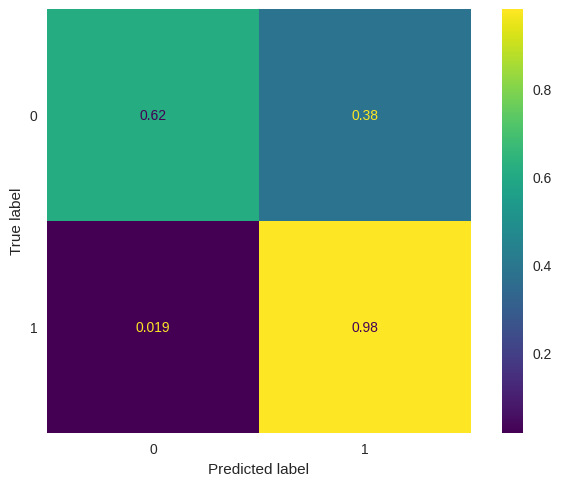

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test7, best_modelRF2.predict(X_test7), labels=best_modelRF2.classes_,normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=best_modelRF2.classes_)
disp.plot()
plt.grid(False)

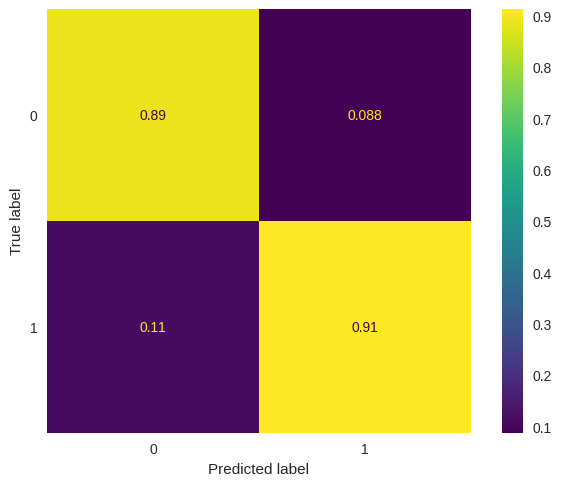

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test7, best_modelRF2.predict(X_test7), labels=best_modelRF2.classes_,normalize='pred')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=best_modelRF2.classes_)
disp.plot()
plt.grid(False)

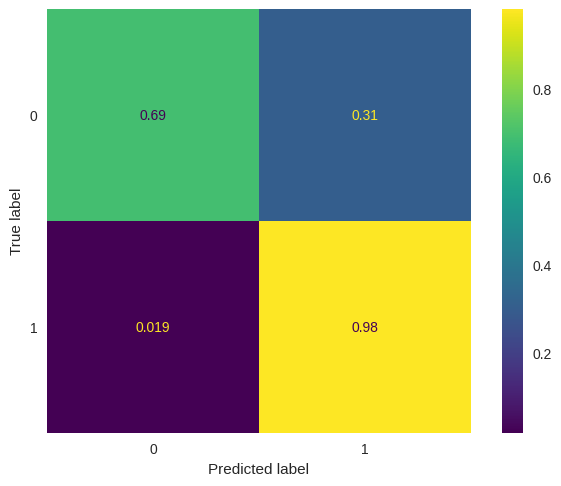

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test7, best_gbm1.predict(X_test7), labels=best_gbm1.classes_,normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=best_gbm1.classes_)
disp.plot()
plt.grid(False)

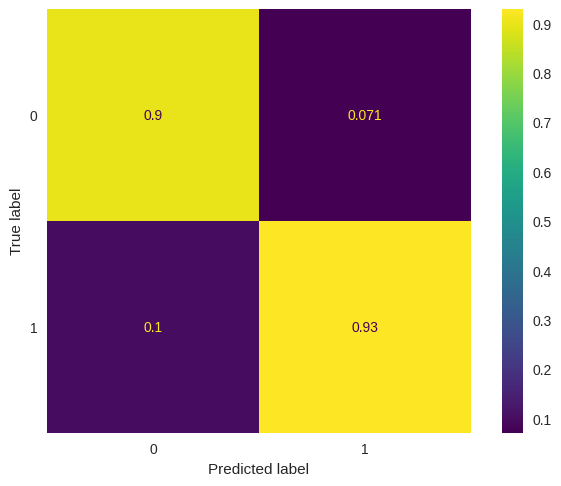

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test7, best_gbm1.predict(X_test7), labels=best_gbm1.classes_,normalize='pred')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=best_gbm1.classes_)
disp.plot()
plt.grid(False)

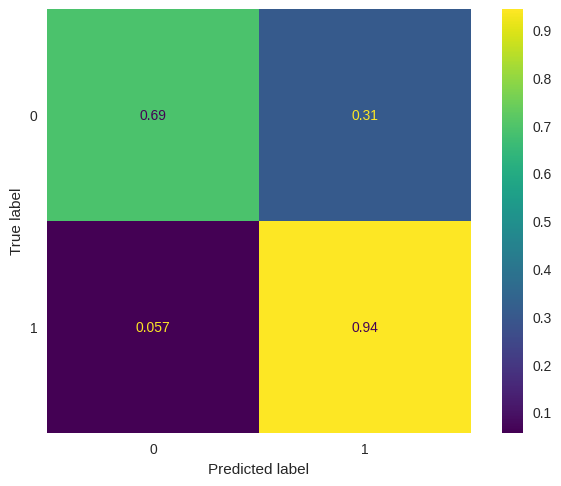

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test7, best_modelKNN.predict(X_test7), labels=best_modelKNN.classes_,normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=best_modelKNN.classes_)
disp.plot()
plt.grid(False)

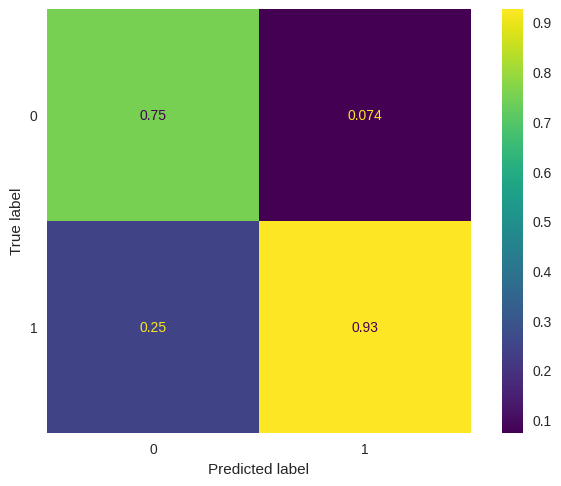

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test7, best_modelKNN.predict(X_test7), labels=best_modelKNN.classes_,normalize='pred')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=best_modelKNN.classes_)
disp.plot()
plt.grid(False)

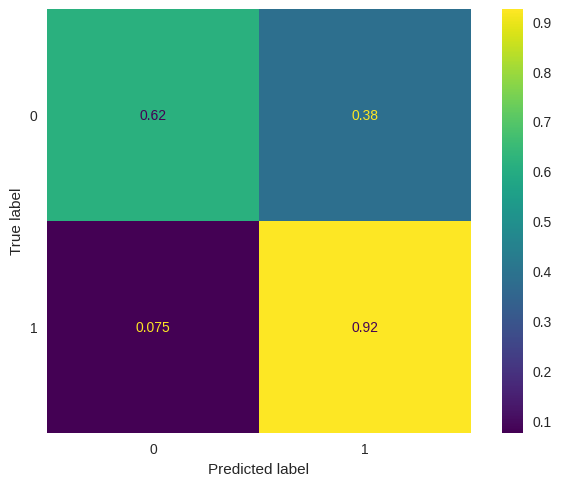

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test7, best_svm1.predict(X_test7), labels=best_svm1.classes_,normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=best_svm1.classes_)
disp.plot()
plt.grid(False)

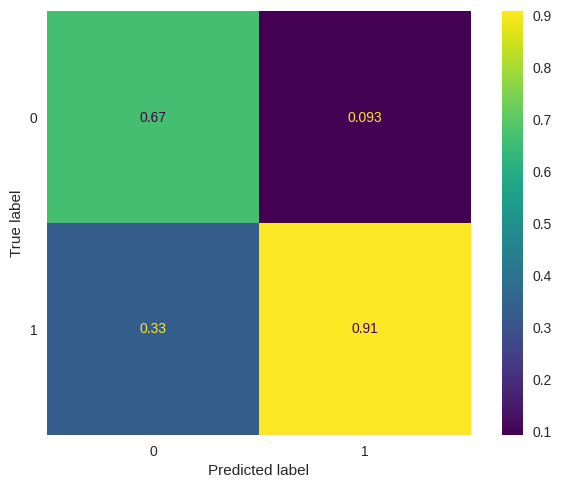

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test7, best_svm1.predict(X_test7), labels=best_svm1.classes_,normalize='pred')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=best_svm1.classes_)
disp.plot()
plt.grid(False)

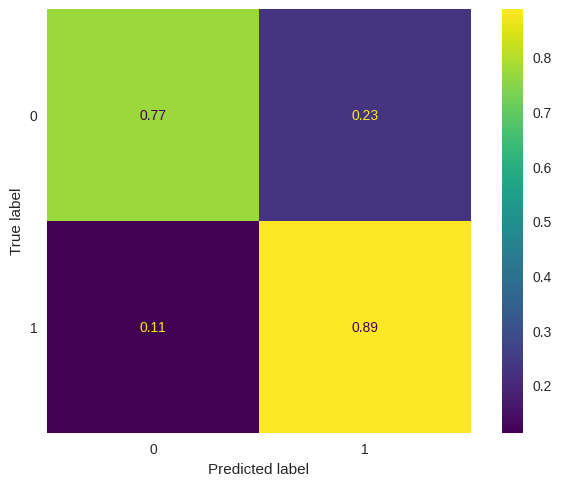

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test7, best_xgb1.predict(X_test7), labels=best_xgb1.classes_,normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=best_xgb1.classes_)
disp.plot()
plt.grid(False)

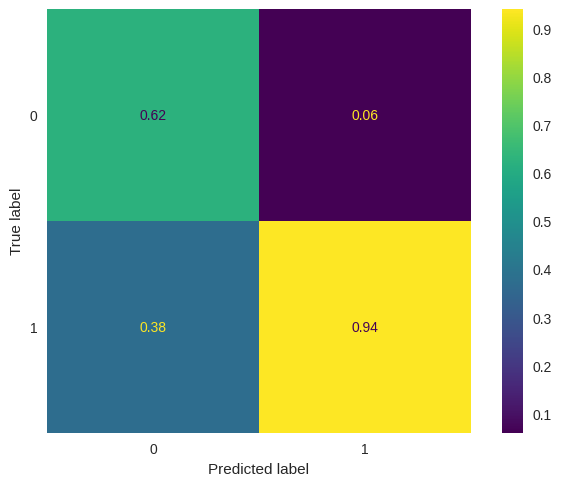

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test7, best_xgb1.predict(X_test7), labels=best_xgb1.classes_,normalize='pred')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=best_xgb1.classes_)
disp.plot()
plt.grid(False)

Feature Importance analysis

In [109]:
importances = rf_clf8.feature_importances_

The feature importance object is implemented on the RF classifier object before hypeparameter tuning (rf_clf8) for data reduction process

In [ ]:

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Correct way to get feature names from a DataFrame
names = [X7.columns[i] for i in indices]

# Create plot
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X7.shape[1]), importances[indices])
plt.xticks(range(X7.shape[1]), names, rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()